— Проведите первичный анализ данных: изучите типы переменных, наличие пропусков, статистические характеристики.

— Визуализируйте распределение количественных переменных с помощью гистограмм и box plot.

— Постройте столбчатые диаграммы для анализа распределения категориальных переменных.

— Сделайте выводы о качестве данных и потенциальных взаимосвязях.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_red = pd.read_csv('winequality-red.csv', sep=";", header=0)
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df_white = pd.read_csv('winequality-white.csv', sep=";", header=0)
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
df_continuous = df_red
def df_histplot(df_continuous, plot_color="red"):
    columns_list = df_continuous.columns.values.tolist()
    nrows = len(columns_list)//3
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 10))
    
    # Цикл для построения гистограмм для каждого числового признака
    for i, col in enumerate(columns_list):
        x = i // 3
        y = i % 3
        values, bin_edges = np.histogram(df_continuous[col],
                                        range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

        graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                            edgecolor='none', color=plot_color, alpha=0.6, line_kws={'lw': 3})
        ax[x, y].set_xlabel(col, fontsize=15)
        ax[x, y].set_ylabel('Количество', fontsize=12)
        ax[x, y].set_xticks(np.round(bin_edges, 1))
        ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
        ax[x, y].grid(color='lightgrey')

        for j, p in enumerate(graph.patches):
            ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                            ha='center', fontsize=10, fontweight="bold")

        textstr = '\n'.join((
            r'$\mu=%.2f$' % df_continuous[col].mean(),
            r'$\sigma=%.2f$' % df_continuous[col].std()
        ))
        ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                    color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

    ax[1,2].axis('off')
    plt.suptitle('Распределение числовых переменных', fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

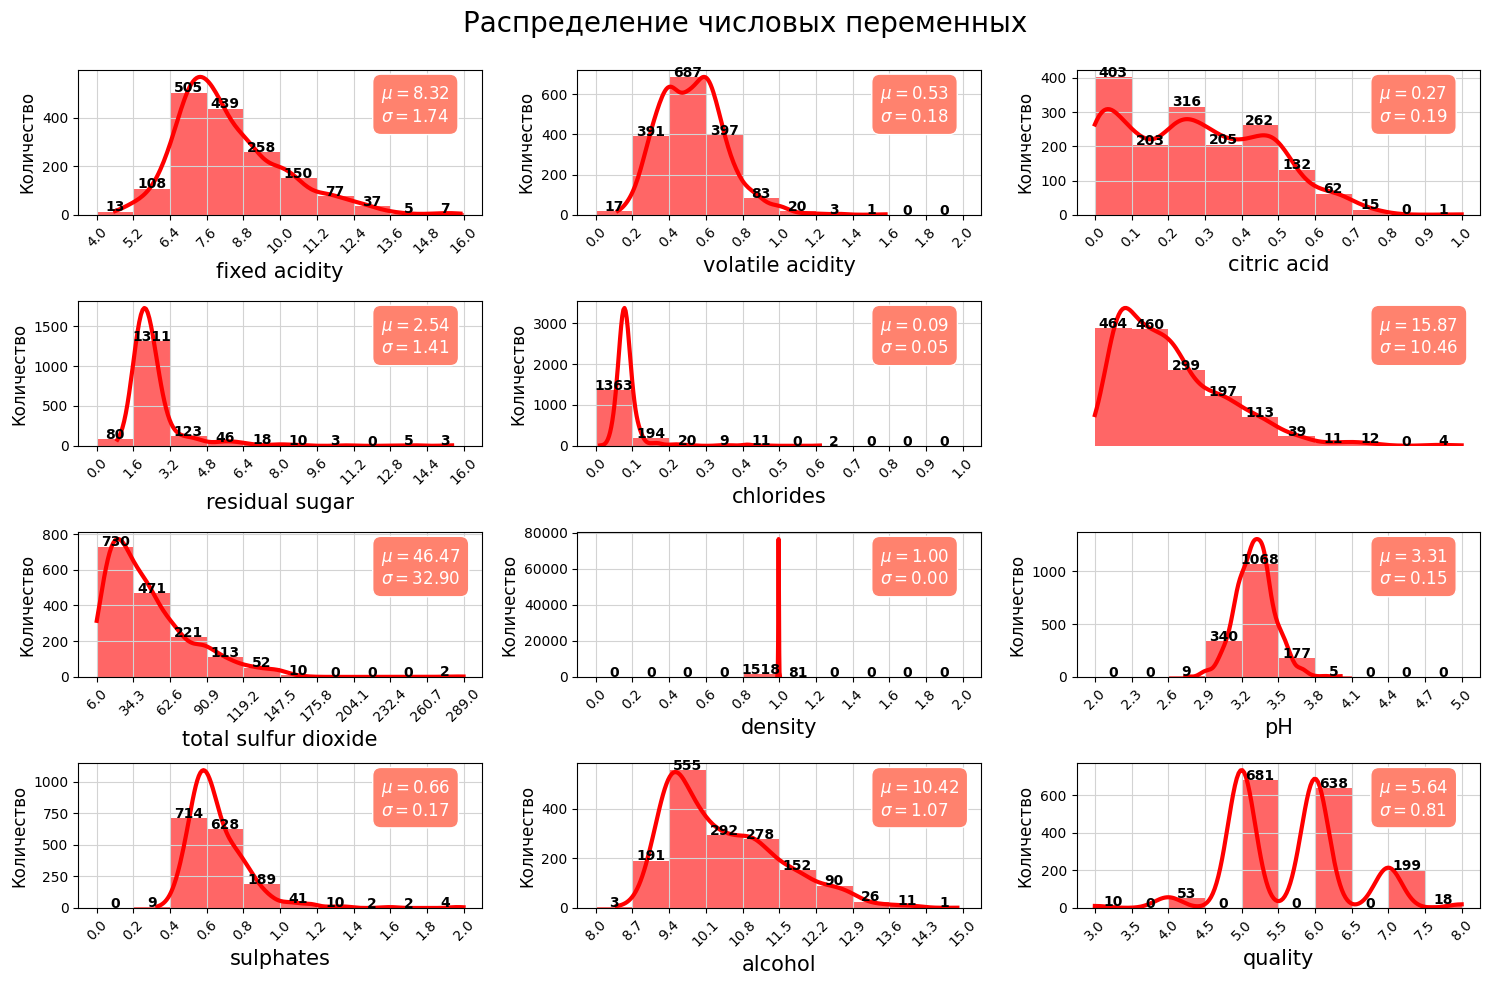

In [12]:
df_histplot(df_continuous, "red")

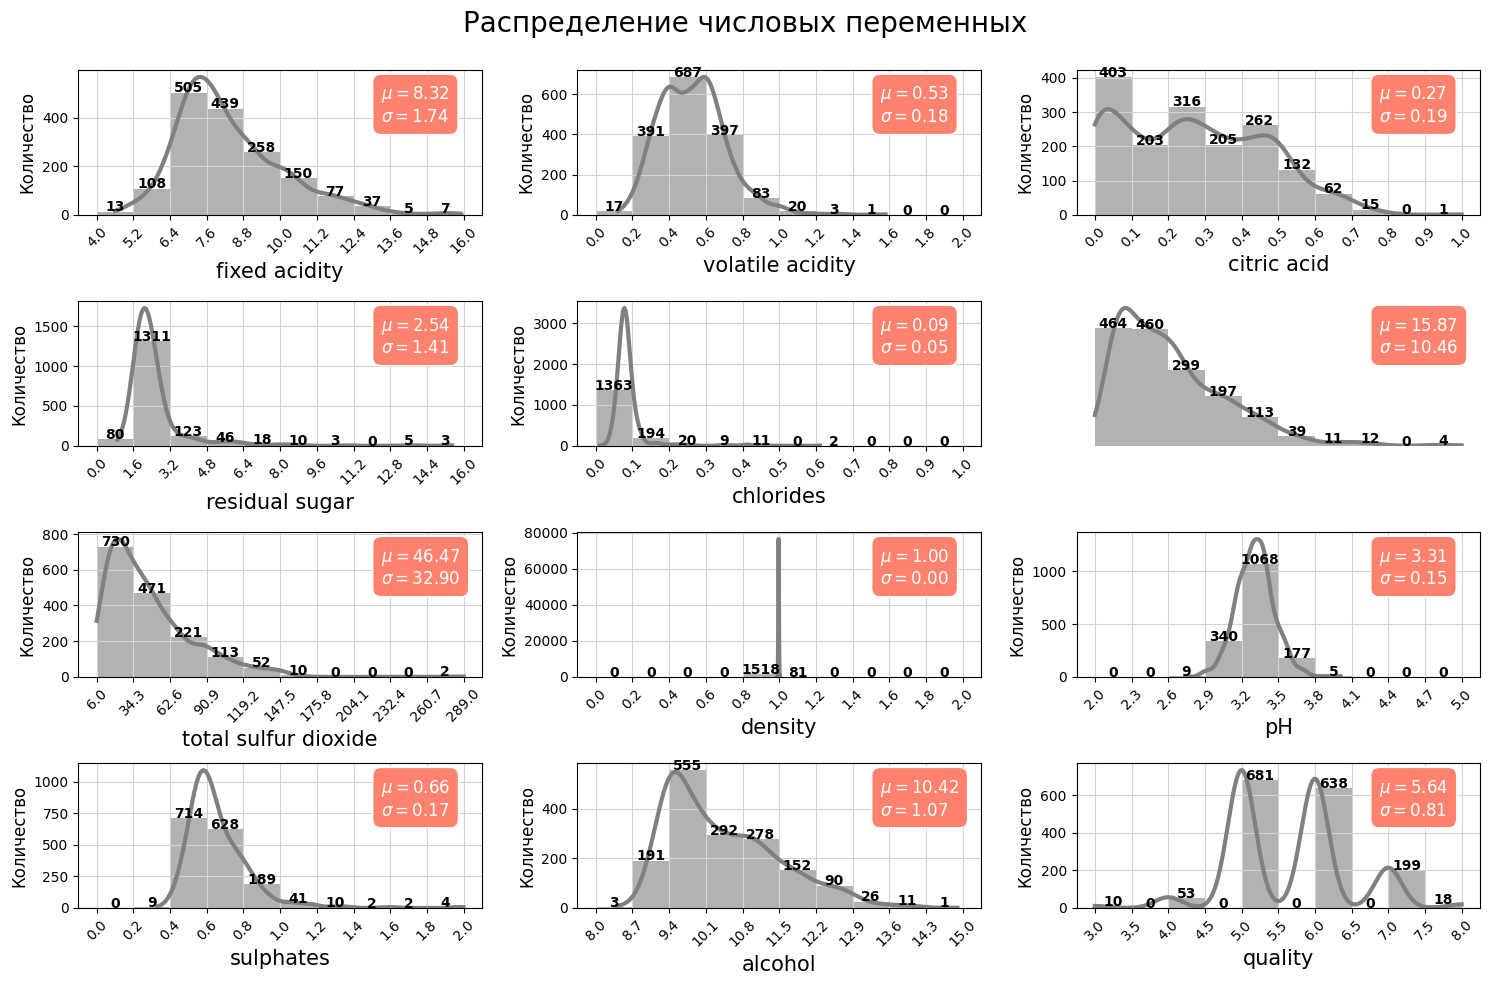

In [13]:
df_histplot(df_continuous, "gray")

In [14]:


def df_boxplot(df_continuous, plot_color="red"):
    columns_list = df_continuous.columns.values.tolist()
    nrows = len(columns_list)//3
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 10))
    # Цикл для построения гистограмм для каждого непрерывного признака
    for i, col in enumerate(df_continuous.columns):
        x = i // 3
        y = i % 3
        values, bin_edges = np.histogram(df_continuous[col],
                                        range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

        graph = sns.boxenplot(data=df_continuous, x=col, ax=ax[x, y],
                            color=plot_color)
        ax[x, y].set_xlabel(col, fontsize=15)
        ax[x, y].set_ylabel('Количество', fontsize=12)
        ax[x, y].set_xticks(np.round(bin_edges, 1))
        ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
        ax[x, y].grid(color='lightgrey')


        textstr = '\n'.join((
            r'$\mu=%.2f$' % df_continuous[col].mean(),
            r'$\sigma=%.2f$' % df_continuous[col].std()
        ))
        ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                    color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

    ax[1,2].axis('off')
    plt.suptitle('Распределение числовых переменных', fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

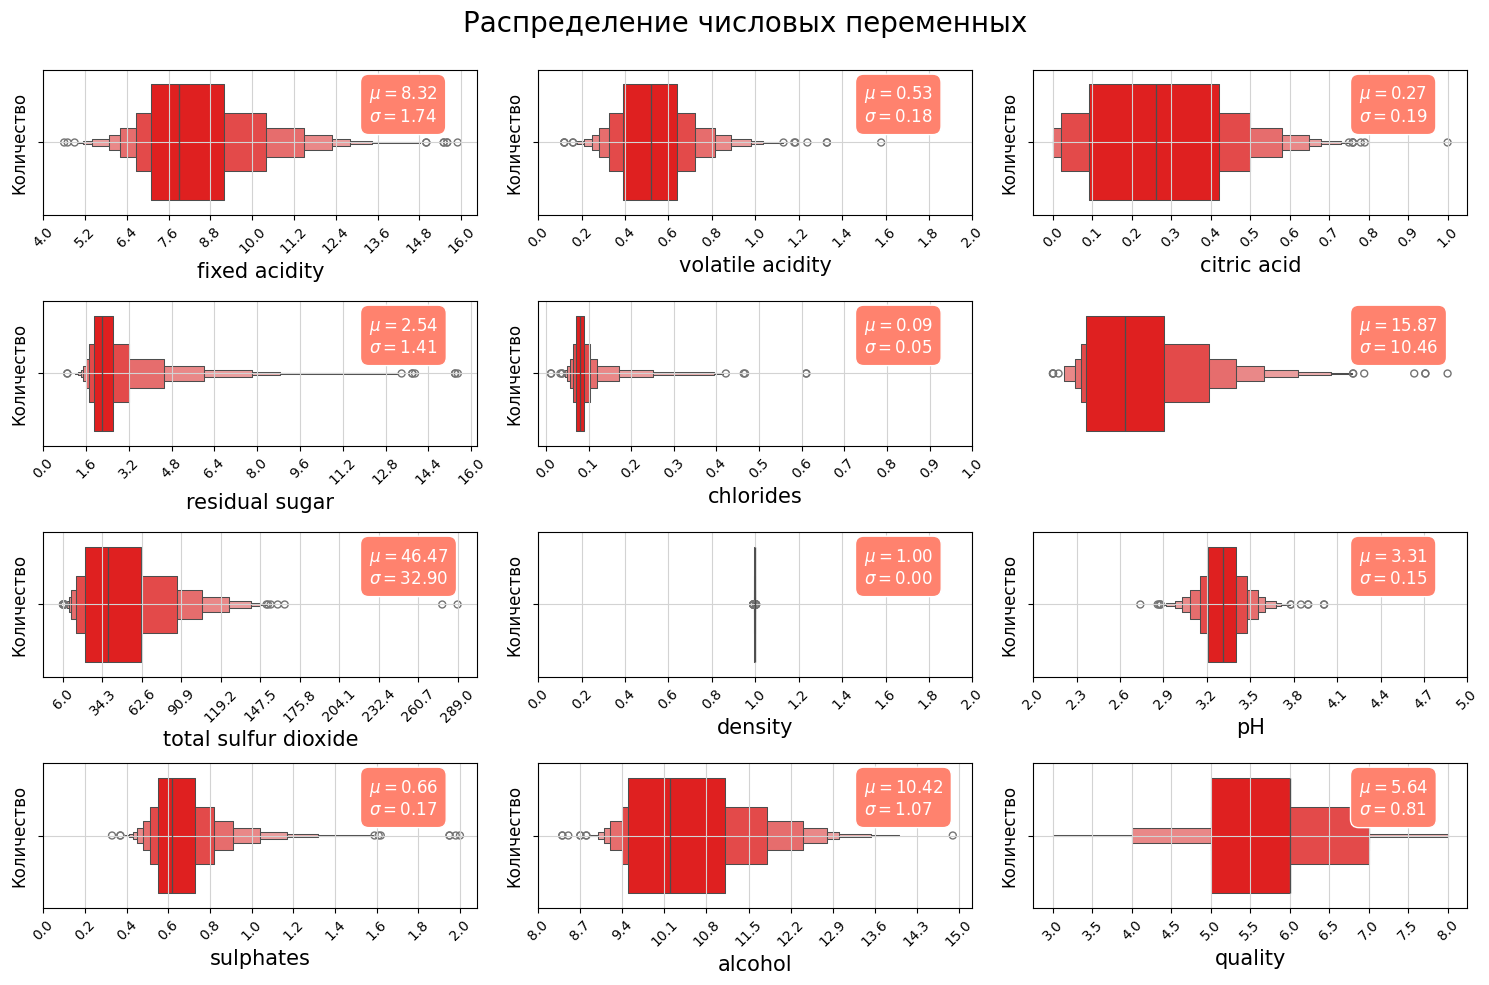

In [15]:
df_boxplot(df_red, "red")

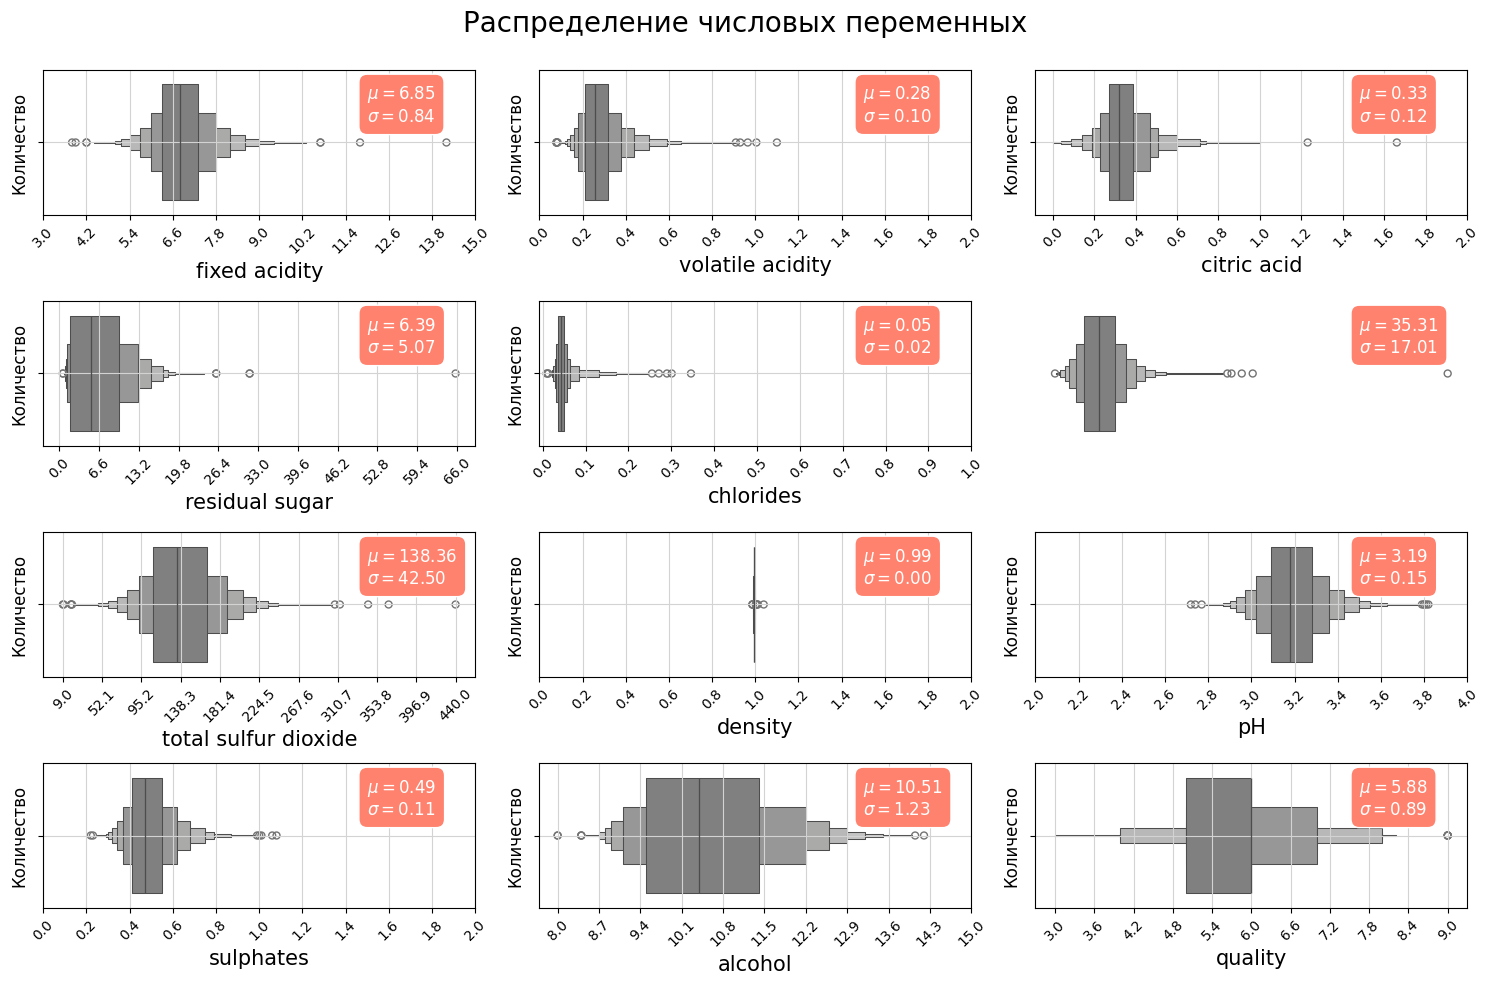

In [16]:
df_boxplot(df_white, "gray")

In [17]:
def df_barplot_one(df_categories, plot_color="red"):
    plt.subplots(figsize=(5, 3))
    # Вычисление процентных значений частоты
    col = df_categories.columns.values
    value_counts = df_categories[col].value_counts(normalize=True).mul(100).sort_values()
    # index, value = value_counts
    for index, value in enumerate(value_counts):
        # Построение столбчатой диаграммы
        value_counts.plot(kind='barh', width=0.8, color=plot_color)
        plt.text(value, index, f"{round(value, 1)}%",fontsize=15, weight='bold', va='center')
    plt.suptitle('Распределение категориальных признаков', fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

def df_barplot_two(df_categories, plot_color="red"):
    fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
    # Вычисление процентных значений частоты
    columns_list = df_categories.columns.values
    for i, col in enumerate(columns_list):
        col_idx = i % 2
        values_counts = df_categories[col].value_counts(normalize=True).mul(100).sort_values()
        values_counts.plot(kind='barh', ax=ax[col_idx], width=0.8, color=plot_color)   
        # index, value = value_counts
        for index, value in enumerate(values_counts):
            # Построение столбчатой диаграммы
            values_counts.plot(kind='barh', width=0.8, color=plot_color)
            ax[col_idx].text(value, index, f"{round(value, 1)}%", fontsize=15, weight='bold', va='center')
        ax[col_idx].set_xlim([0, 95])
        ax[col_idx].set_xlabel('Частота в процентах', fontsize=12)
        ax[col_idx].set_title(f'{col}', fontsize=20)
    plt.suptitle('Распределение категориальных признаков', fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

def df_barplot(df_continuous, plot_color="red"):
    columns_list = df_continuous.columns.values.tolist()
    nrows = len(columns_list)//2 + len(columns_list)%2
    if len(columns_list) == 1:
        df_barplot_one(df_continuous, plot_color=plot_color)
        return
    elif len(columns_list) == 2:
        df_barplot_two(df_continuous, plot_color=plot_color)
        return
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 18))

    # Цикл для построения столбчатых диаграмм для каждого категориального объекта в макете 4х2
    for i, col in enumerate(columns_list):
        row = i // 2
        col_idx = i % 2

        # Вычисление процентных значений частоты
        values_counts = df_continuous[col].value_counts(normalize=True).mul(100).sort_values()

        # Построение столбчатой диаграммы
        values_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color=plot_color)

        # Добавим процентные значения частоты к столбцам
        for index, value in enumerate(values_counts):
            ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')

        ax[row, col_idx].set_xlim([0, 95])
        ax[row, col_idx].set_xlabel('Частота в процентах', fontsize=12)
        ax[row, col_idx].set_title(f'{col}', fontsize=20)

    # ax[4,1].axis('off')
    plt.suptitle('Распределение категориальных признаков', fontsize=22)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

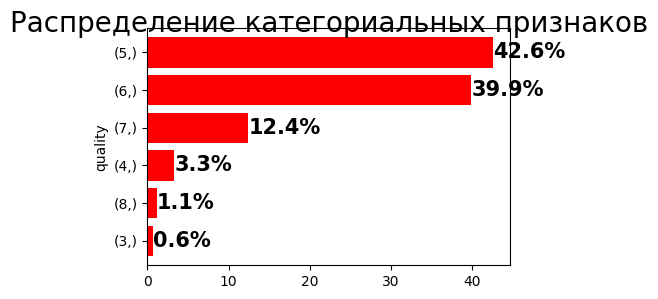

In [24]:
categorial = ['quality']
df_red_cat = df_red[categorial]
df_barplot(df_red_cat, plot_color="red")

In [19]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
# concatinate dataframes target: red=0, white=1
df_red["target"] = 0
df_white["target"] = 1
frames = [df_red, df_white]
df = pd.concat(frames)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [21]:

def df_target(df_continuous):
    continuous_features = df_continuous.columns.values.tolist()

    sns.set_palette(['#ff826e', 'red'])
    fig, ax = plt.subplots(len(continuous_features)-1, 2, figsize=(15,20), gridspec_kw={'width_ratios': [1, 2]})

    # Цикл для каждого численного признака для создания линейчатых диаграмм и графиков kde
    for i, col in enumerate(continuous_features):
        if col == "target":
            continue
        # Гистограмма, показывающая среднее значение признака для каждой целевой категории
        graph = sns.barplot(data=df_continuous, x="target", y=col, ax=ax[i,0])

        # График KDE, показывающий распределение признака для каждой целевой категории
        sns.kdeplot(data=df_continuous[df_continuous["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0',
                    color = 'blue')
        sns.kdeplot(data=df_continuous[df_continuous["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
        ax[i,1].set_yticks([])
        ax[i,1].legend(title='Wine type (red=0, white=1)', loc='upper right')

        # средние значения в гистограмму
        for cont in graph.containers:
            graph.bar_label(cont, fmt='         %.3g')


    plt.suptitle('Количественные признаки в сравнении с целевым распределением', fontsize=22)
    plt.tight_layout()
    plt.show()

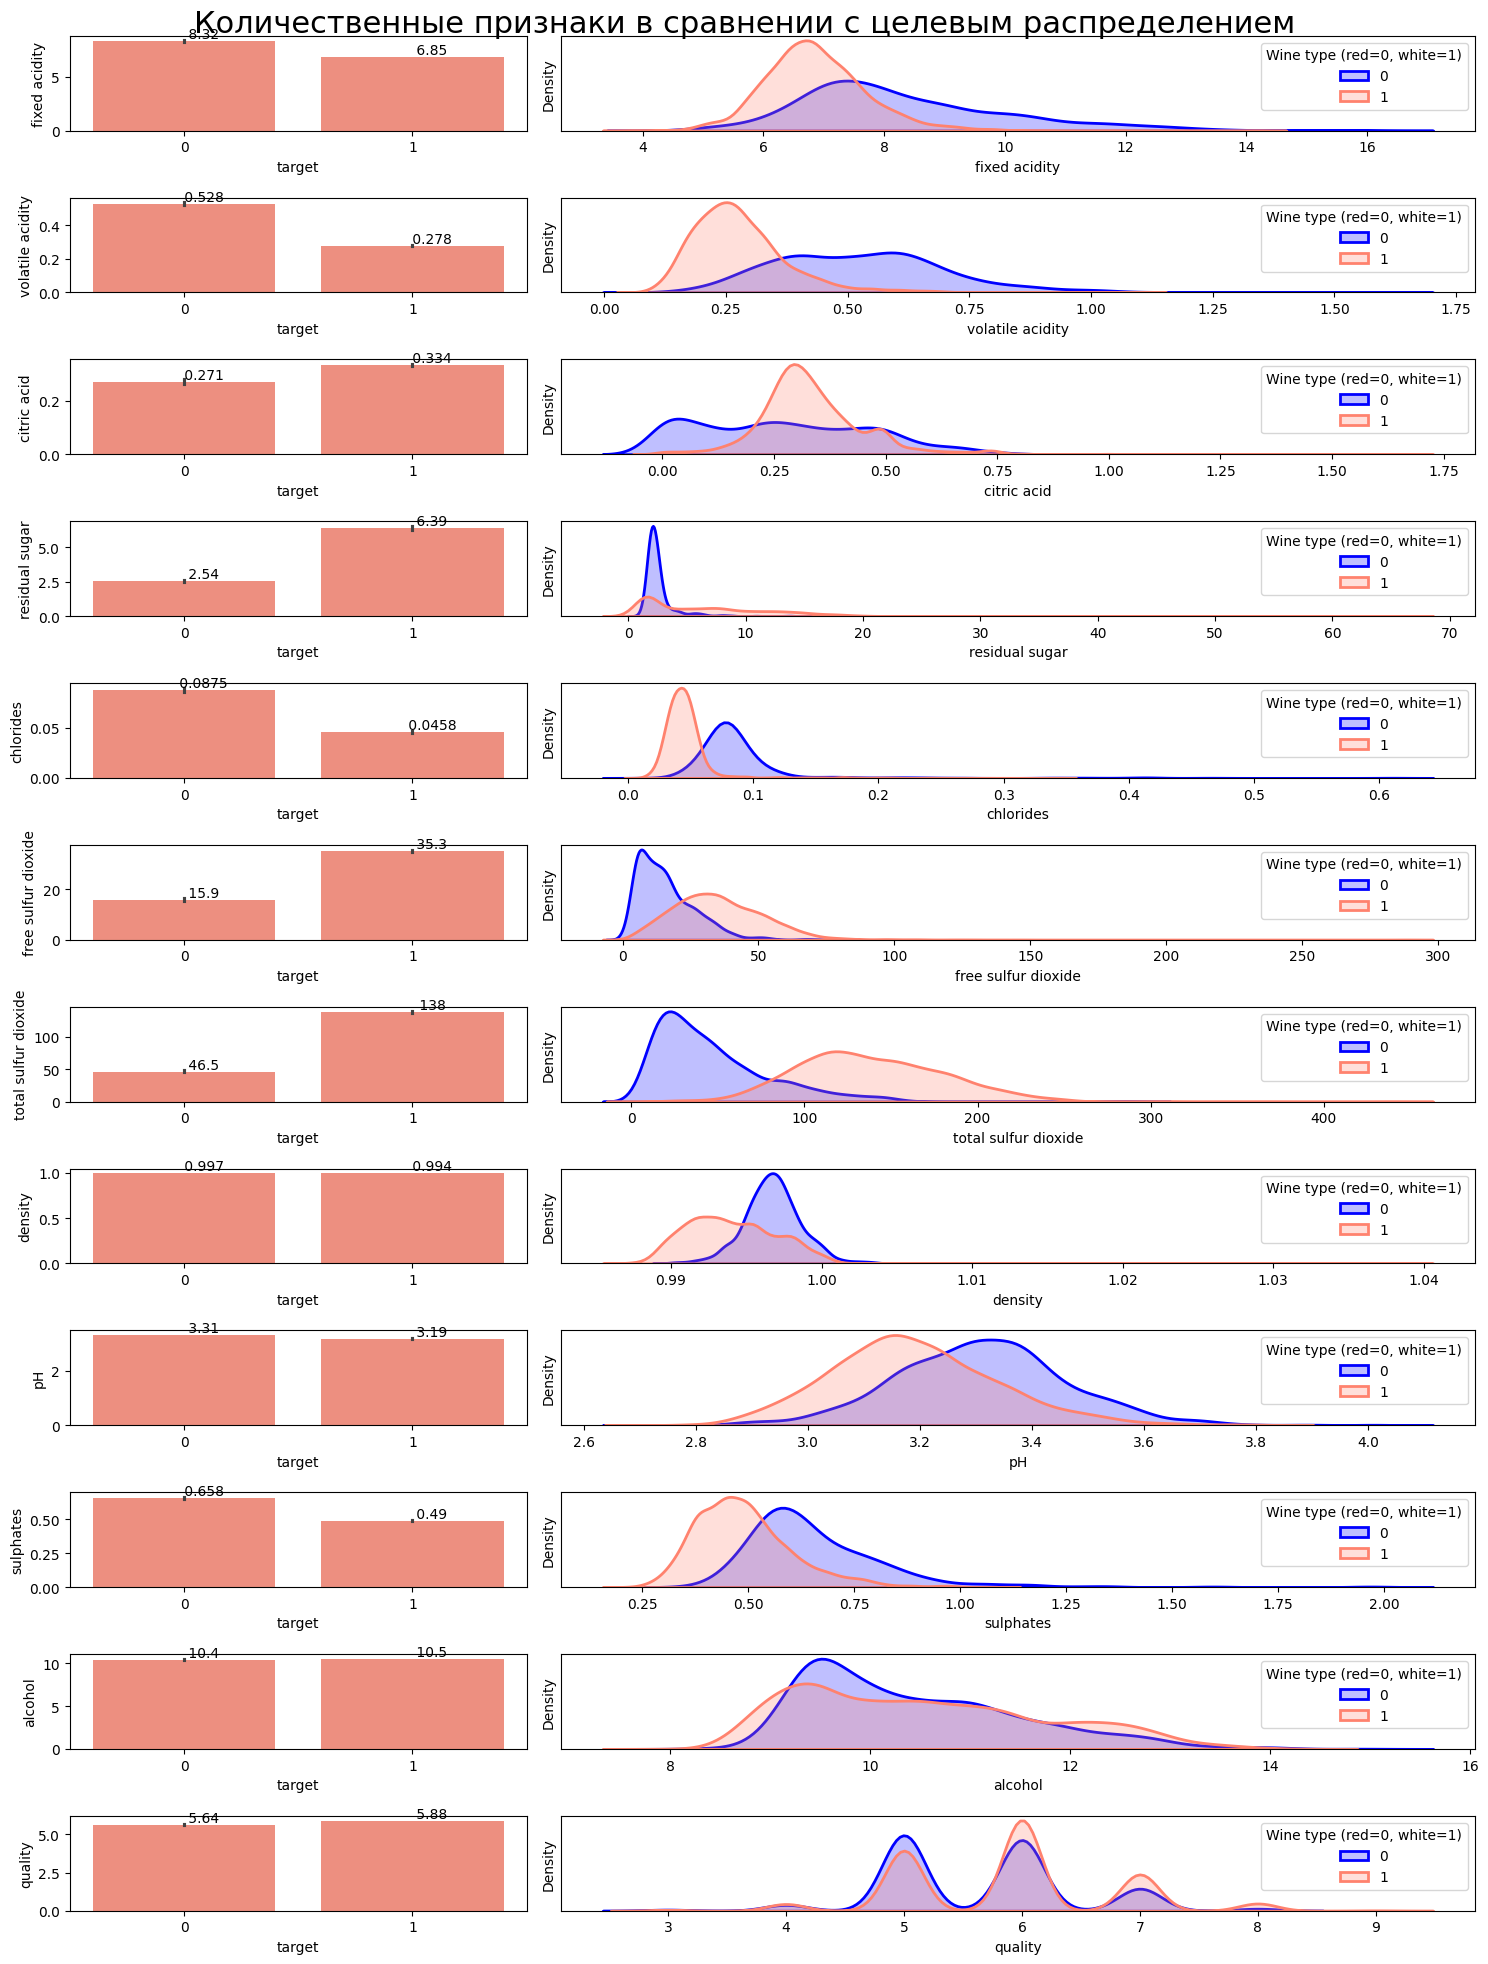

In [22]:
df_target(df)

In [23]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'target'],
      dtype='object')

### Основываясь на представленных данных и описании признаков, можно сделать следующие выводы:

1. Переменные, которые наиболее характерны для определения типа вина:
<ul>
  <li>наличие диоксида серы ('total sulfur dioxide' ) для белого вина более характерно (в три раза больше)</li>
  <li>в красном вине больше хлоридов ('chlorides') </li>
</ul> 

2. Потенциальные закономерности и взаимосвязи:
<ul>
  <li>белому вину ставят более высокие оценки</li>
  <li>наличие сахара в красном вине регламентировано, т.к. цифры имеют малую дисперсию, а белое вино может иметь почти любое количество сахара.</li>
  <li>лимонная кислота в белом вине присутствует только в определенных сортах вина, т.к. имеет два четко выраженных пика.</li>
  <li>плотность у красного вина как правило выше.</li>
</ul> 

3. Качество и полнота данных:
<ul>
  <li>Данные не содержат пропущенных значений, что является положительным фактором для анализа.</li>
  <li>В данных по многим категориям есть "выбросы", которые появляются, скорее всего, из-за каких-то специфических сортов вина ('residual sugar', 'sulphates', 'residual sugar', 'chlorides')</li>
  <li>Дополнительная переменная прозрачность могла бы улучшить анализ</li>
</ul> 

Основываясь на представленных данных и описании признаков, можно сделать следующие выводы:

1. В белое вино добавляют больше диоксида серы и лимонной кислоты, судя по выраженным пикам в распределениях.

2. Красное вино содержит больше хлоридов.

3. Белому вину дается более высокая оценка.